In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

## Задача 1. 

Поиграемся с датасетом про диабет (он совсем легкий). 

In [5]:
data = pd.read_csv('Diabetes Binary Classification.csv')
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Работа с признаками

In [10]:
#проверяем наны
data.isna().sum()
#нанов нет

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable (0 or 1)                                                     0
dtype: int64

In [15]:
#проверяю типы
data.dtypes
#только инты и флоты, подходит

Number of times pregnant                                                      int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
Diastolic blood pressure (mm Hg)                                              int64
Triceps skin fold thickness (mm)                                              int64
2-Hour serum insulin (mu U/ml)                                                int64
Body mass index (weight in kg/(height in m)^2)                              float64
Diabetes pedigree function                                                  float64
Age (years)                                                                   int64
Class variable (0 or 1)                                                       int64
dtype: object

<Axes: >

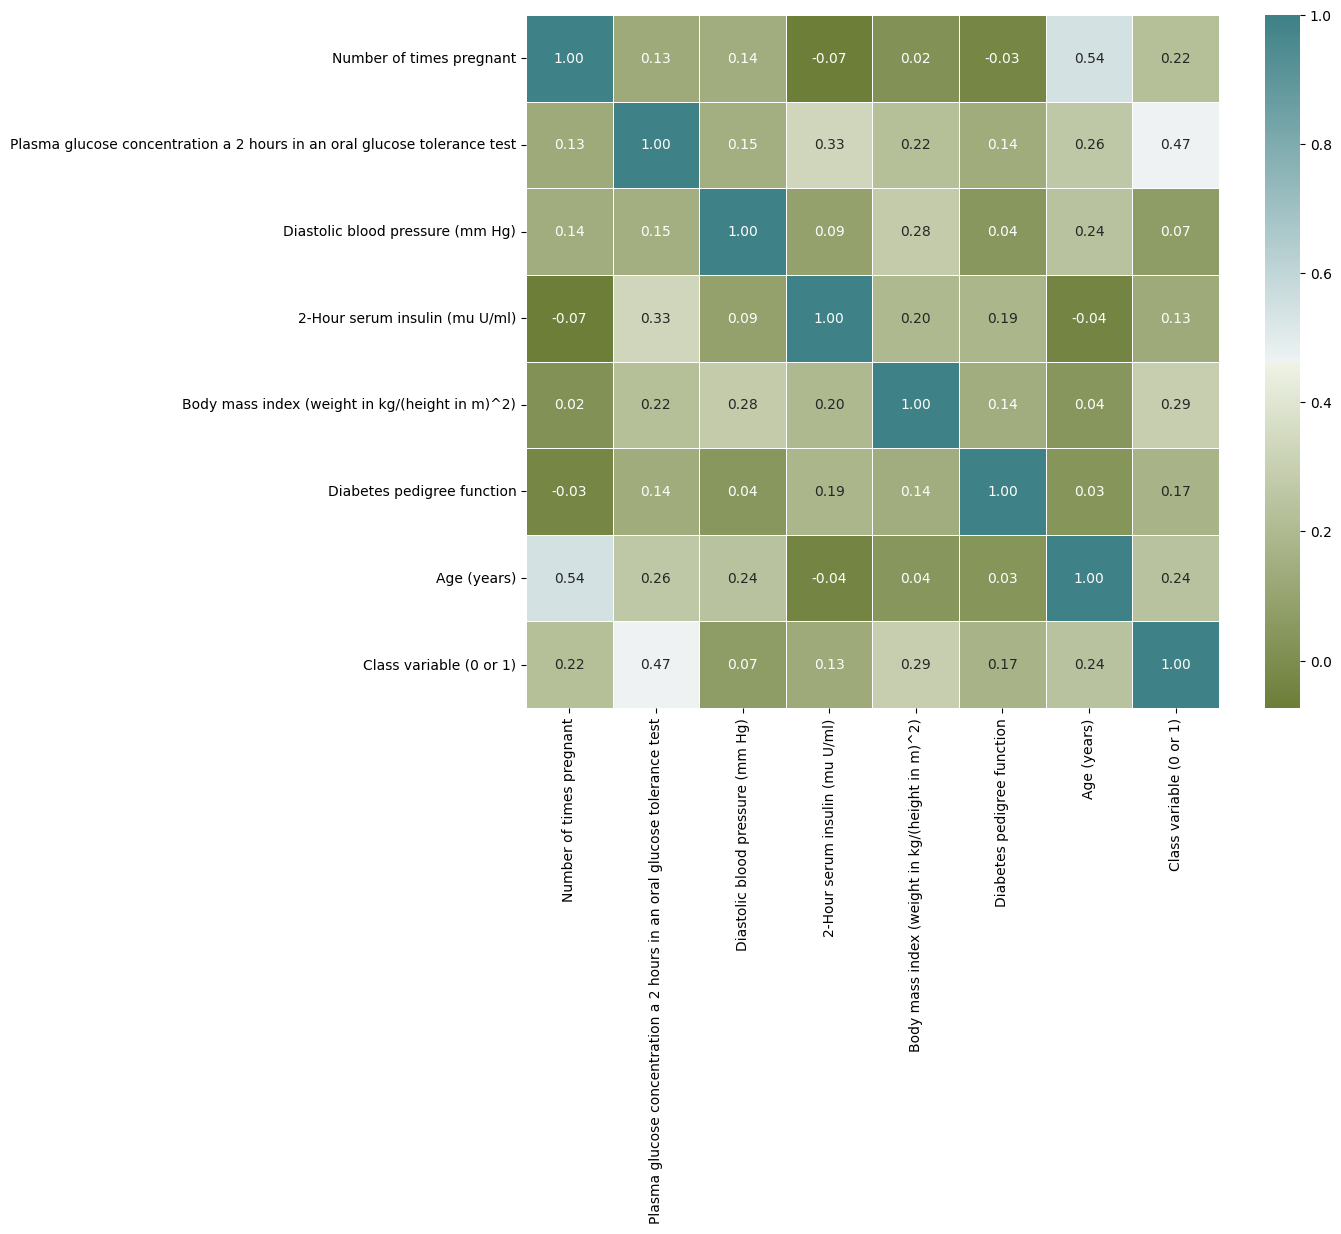

In [18]:
#посмотрим табличку корреляций
import seaborn as sns
from matplotlib import pylab as plt
plt.figure(figsize=(12, 9))

import numpy as np



corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)


In [17]:
#хочется дропнуть Triceps skin fold thickness (mm) т.к. он очень слобо коррелирует с целевой переменной(0,07), но относительно сильно (0,44) корелирует с другим признаком
data.drop('Triceps skin fold thickness (mm)', axis=1, inplace=True)
#вернемся выше и снова глянем на табличку
#ну допустим...

Целевая переменная тут явно обозначена как Class variable (очевидно, есть у человека диабет или нет)

Обучение

In [30]:
#разделим на train и test
X = data.drop('Class variable (0 or 1)', axis=1)
y = data['Class variable (0 or 1)']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [32]:
y.value_counts()
#баланс выборки средний

0    500
1    268
Name: Class variable (0 or 1), dtype: int64

In [33]:
#соберем pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])

In [34]:
#так-так
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       426
           1       0.57      0.75      0.65       150

    accuracy                           0.79       576
   macro avg       0.73      0.77      0.75       576
weighted avg       0.81      0.79      0.79       576
               precision    recall  f1-score   support

           0       0.88      0.77      0.82       137
           1       0.56      0.73      0.63        55

    accuracy                           0.76       192
   macro avg       0.72      0.75      0.73       192
weighted avg       0.79      0.76      0.77       192



точность предсказания для диабетиков не очень хорошая, скорее всего из-за баланса выборки

In [36]:
#попробуем сделать выборку более равномерной
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [37]:
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))
#ну как будто не поменялось ничего особо, немного переобучилась теперь

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       417
           1       0.61      0.77      0.68       159

    accuracy                           0.80       576
   macro avg       0.75      0.79      0.77       576
weighted avg       0.82      0.80      0.81       576
               precision    recall  f1-score   support

           0       0.82      0.76      0.78       135
           1       0.51      0.60      0.55        57

    accuracy                           0.71       192
   macro avg       0.66      0.68      0.67       192
weighted avg       0.72      0.71      0.71       192



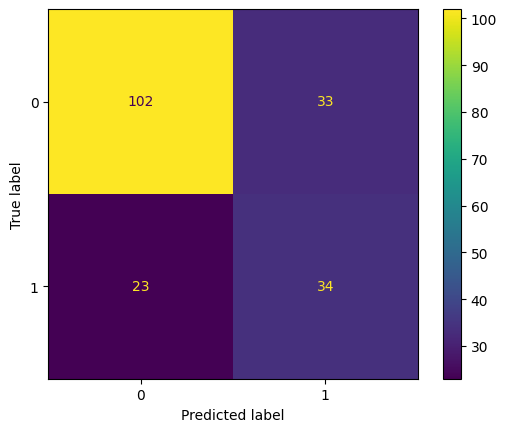

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ypred_test, y_test)
ConfusionMatrixDisplay(cm).plot()

с предсказанием людей, больных диабетом есть проблемки

## Задача 2. 

Второй датасет - про покупателей велосипедов. 

In [96]:
data = pd.read_csv('bike_buyers_clean.csv')
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [97]:
data.value_counts()

ID     Marital Status  Gender  Income  Children  Education        Occupation      Home Owner  Cars  Commute Distance  Region         Age  Purchased Bike
11000  Married         Male    90000   2         Bachelors        Professional    Yes         0     1-2 Miles         Pacific        40   Yes               1
23089  Married         Male    40000   0         Partial College  Skilled Manual  Yes         1     5-10 Miles        North America  28   No                1
22864  Married         Male    90000   2         Partial College  Professional    No          0     5-10 Miles        North America  49   Yes               1
22918  Single          Male    80000   5         Graduate Degree  Management      Yes         3     0-1 Miles         Pacific        40   No                1
22930  Married         Male    90000   4         Bachelors        Professional    Yes         0     1-2 Miles         Pacific        38   Yes               1
                                                         

поработаем с характеристиками

In [98]:
#ID дропаем
data.drop('ID', axis=1, inplace=True)

#из букв в чиселки
#data['Gender'] = data.apply(lambda x : 1 if x['Gender'] == 'Female' else 0, axis = 1)
data['Marital Status'] = data.apply(lambda x : 1 if x['Marital Status'] == 'Married' else 0, axis = 1)
data['Home Owner'] = data.apply(lambda x : 1 if x['Home Owner'] == 'Yes' else 0, axis = 1)
data['Purchased Bike'] = data.apply(lambda x : 1 if x['Purchased Bike'] == 'Yes' else 0, axis = 1)

#меняем значения на циферки
def map_distance(distance):
    d = {'0-1 Miles': 0, '1-2 Miles' : 1, '2-5 Miles' : 2, '5-10 Miles' : 3, '10+ Miles': 4}
    return d[distance]
data['Commute Distance'] = data['Commute Distance'].apply(map_distance)

#время get_dummies
#data = pd.get_dummies(data, columns=['Education', 'Occupation', 'Region'], drop_first = True)

#кажется все


C:\Users\пк\AppData\Local\Temp\ipykernel_6504\2614083309.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

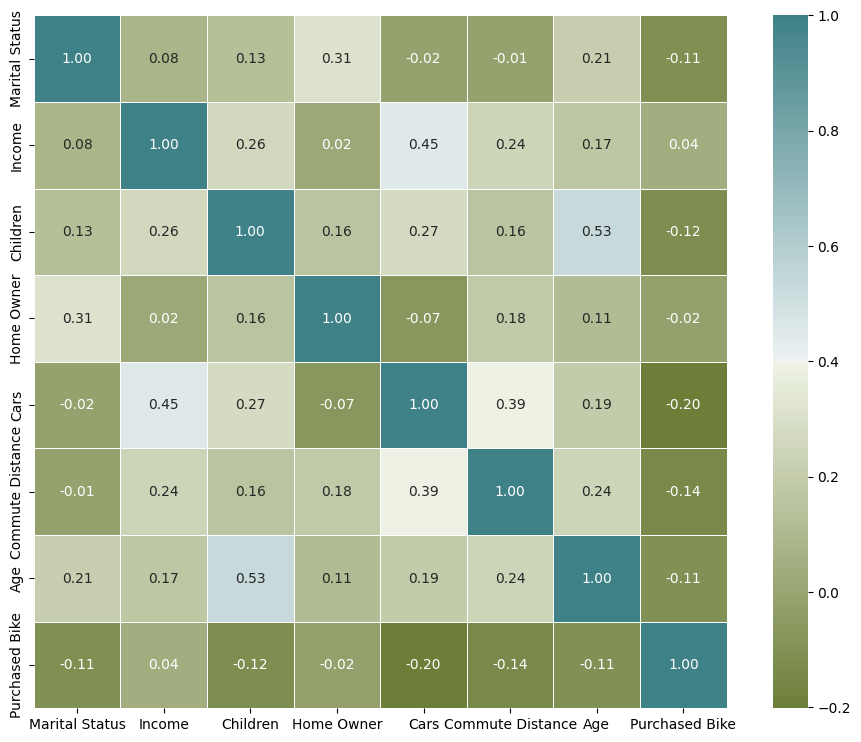

In [99]:
#посмотрим табличку корреляций
import seaborn as sns
from matplotlib import pylab as plt
plt.figure(figsize=(12, 9))

import numpy as np



corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

Пытаемся по характеристикам человека понять, купит он велик или нет. 

Обучаем

In [100]:
X = data.drop('Purchased Bike', axis=1)
y = data['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [85]:
y.value_counts()
#вау, баланс выборки кажется нормальным будто даже

0    519
1    481
Name: Purchased Bike, dtype: int64

In [86]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(class_weight='balanced'))])

In [87]:
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))
#нуу зато не переобучилась...практически

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       386
           1       0.65      0.64      0.64       364

    accuracy                           0.66       750
   macro avg       0.66      0.66      0.66       750
weighted avg       0.66      0.66      0.66       750
               precision    recall  f1-score   support

           0       0.62      0.60      0.61       131
           1       0.58      0.61      0.59       119

    accuracy                           0.60       250
   macro avg       0.60      0.60      0.60       250
weighted avg       0.60      0.60      0.60       250



In [101]:
#уберу occupation и education! мое волевое решение...
data.drop('Occupation', axis=1, inplace=True)
data.drop('Education', axis=1, inplace=True)
data.drop('Region', axis=1, inplace=True)

In [94]:
X = data.drop('Purchased Bike', axis=1)
y = data['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(class_weight='balanced'))])

pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65       374
           1       0.65      0.62      0.64       376

    accuracy                           0.65       750
   macro avg       0.65      0.65      0.65       750
weighted avg       0.65      0.65      0.65       750
               precision    recall  f1-score   support

           0       0.60      0.62      0.61       124
           1       0.61      0.59      0.60       126

    accuracy                           0.60       250
   macro avg       0.60      0.60      0.60       250
weighted avg       0.60      0.60      0.60       250



лучше не стало..

#уберу еще пол и возраст))))......

In [102]:
data.drop(['Age', 'Gender'], axis=1, inplace=True)

In [103]:
X = data.drop('Purchased Bike', axis=1)
y = data['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(class_weight='balanced'))])

pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))
#теперь точно не переобучилась

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       373
           1       0.63      0.62      0.62       377

    accuracy                           0.63       750
   macro avg       0.63      0.63      0.63       750
weighted avg       0.63      0.63      0.63       750
               precision    recall  f1-score   support

           0       0.65      0.68      0.66       130
           1       0.63      0.60      0.62       120

    accuracy                           0.64       250
   macro avg       0.64      0.64      0.64       250
weighted avg       0.64      0.64      0.64       250

